<a href="https://colab.research.google.com/github/Benylaode/Clustering-And-Klasifiktion-/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Laode_Fahmi_Hidayat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# **2. Memuat Dataset dari Hasil Clustering dan Melakukan Encoding**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [26]:
df = pd.read_csv("hasil_clutering.csv")
print(df.head())

                             title  \
0                            "Sr."   
1              #1 Cheerleader Camp   
2  #AMFAD: All My Friends Are Dead   
3                         #Iamhere   
4                           #Stuck   

                                                cast        director  \
0  Chris Smith, Sean Hayes, Robert Downey Jr., Al...     Chris Smith   
1  Charlene Tilton, Erica Duke, Jay Gillespie, Ha...       Mark Quod   
2  Michaella Russell, Jennifer Ens, Jade Pettyjoh...  Marcus Dunstan   
3  Bae Doona, Ilian Bergala, Jules Sagot, Camille...   Eric Lartigau   
4  Madeline Zima, Jayson Blair, Abraham Benrubi, ...    Stuart Acher   

                   genres                   country  popularity  vote_count  \
0             Documentary  United States of America       7.680          57   
1                  Comedy  United States of America       7.203          98   
2        Horror, Thriller  United States of America      19.881          31   
3         Romance, Com

In [27]:
df.describe()

,popularity,vote_count,vote_average,release_year,rating
count,11985.000000,11985.000000,11985.000000,11985.000000,11985.000000
mean,11.164264,214.181977,6.287840,2016.836796,6.287840
std,4.258497,207.687402,0.882857,4.300996,0.882857
min,6.546000,31.000000,4.000000,2010.000000,4.000000
25%,7.585000,62.000000,5.700000,2013.000000,5.700000
50%,9.927000,128.000000,6.300000,2017.000000,6.300000
75%,13.766000,292.000000,6.900000,2021.000000,6.900000
max,19.881000,705.000000,8.800000,2025.000000,8.800000


saya mencoba untuk melakukan encoding terlebih dahulu

In [28]:
df['genres'] = df['genres'].str.split(', ')
df['cast'] = df['cast'].str.split(', ')
df['director'] = df['director'].str.split(', ')
df['country'] = df['country'].str.split(', ')

In [29]:
df = df.explode('genres').explode('cast').explode('director').explode('country')

In [30]:
df.head()

,title,cast,director,genres,country,popularity,vote_count,vote_average,release_year,rating,Cluster
0,"""Sr.""",Chris Smith,Chris Smith,Documentary,United States of America,7.68,57,6.9,2022,6.9,perfectly rated
0,"""Sr.""",Sean Hayes,Chris Smith,Documentary,United States of America,7.68,57,6.9,2022,6.9,perfectly rated
0,"""Sr.""",Robert Downey Jr.,Chris Smith,Documentary,United States of America,7.68,57,6.9,2022,6.9,perfectly rated
0,"""Sr.""",Alan Arkin,Chris Smith,Documentary,United States of America,7.68,57,6.9,2022,6.9,perfectly rated
0,"""Sr.""",Robert Downey Sr.,Chris Smith,Documentary,United States of America,7.68,57,6.9,2022,6.9,perfectly rated


In [31]:
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:  # Hanya kolom kategorikal
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [32]:
df = df.groupby([ 'title'], as_index=False).agg({
    'cast': lambda x: sum(float(v) for v in set(x) if pd.notna(v)),
    'director': lambda x: sum(float(v) for v in set(x) if pd.notna(v)),
    'genres': lambda x: sum(float(v) for v in set(x) if pd.notna(v)),
    'country': lambda x: sum(float(v) for v in set(x) if pd.notna(v)),
    'popularity': 'first',
    'vote_count': 'first',
    'vote_average': 'first',
    'release_year': 'first',
    'rating': 'first' ,
    'Cluster' : 'first'
})

In [33]:
df.head()

,title,cast,director,genres,country,popularity,vote_count,vote_average,release_year,rating,Cluster
0,0,80043.0,1444.0,5.0,120.0,7.680,57,6.9,2022,6.9,1
1,1,47086.0,5292.0,3.0,120.0,7.203,98,4.8,2010,4.8,0
2,2,58909.0,5201.0,26.0,120.0,19.881,31,6.0,2024,6.0,0
3,3,33477.0,2374.0,16.0,52.0,8.948,208,5.6,2020,5.6,0
4,4,57256.0,7609.0,22.0,120.0,6.546,31,5.5,2014,5.5,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [34]:
X = df.drop(columns=["Cluster"])
y = df["Cluster"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)

Ukuran data latih: (9588, 10)
Ukuran data uji: (2397, 10)


In [36]:
y

,Cluster
0,1
1,0
2,0
3,0
4,0
...,...
11980,2
11981,1
11982,2
11983,1


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

saya memilih KNN karena ini cocok dengan model saya yang mana banyak data numerik yang cederung bersifat berdekatan

In [37]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model KNN: {accuracy:.2f}")

Akurasi model KNN: 0.99


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [38]:
cm = confusion_matrix(y_test, y_pred)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Akurasi model KNN: {accuracy}")
print(f"Presisi: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Akurasi model KNN: 0.9945765540258656
Presisi: 0.99
Recall: 0.99
F1-Score: 0.99


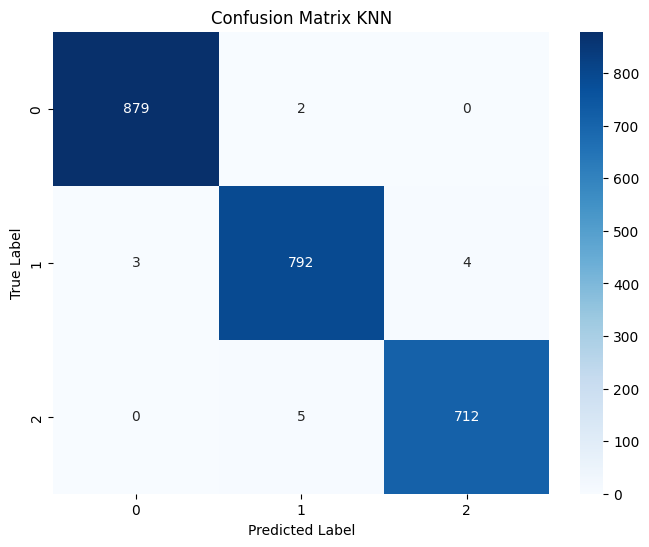

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_encoder.classes_, yticklabels=y_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix KNN")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

ALgoritma menunjukan hasil yang sangat baik hal ini ditunjukan dengan kemampuan model untuk memprediksi dengan baik dengan tingkat akurasi mencapai 95

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [41]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Jumlah tetangga
    'weights': ['uniform', 'distance'],  # Cara menghitung bobot
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Metode jarak
}

In [42]:
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best Accuracy: 0.9955155099289982


In [47]:
knn = KNeighborsClassifier(n_neighbors=11,weights="distance", metric="manhattan" )

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model KNN: {accuracy}")

Akurasi model KNN: 0.9945765540258656


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [44]:
cm = confusion_matrix(y_test, y_pred)

In [45]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Akurasi model KNN: {accuracy:.2f}")
print(f"Presisi: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Akurasi model KNN: 0.99
Presisi: 0.99
Recall: 0.99
F1-Score: 0.99


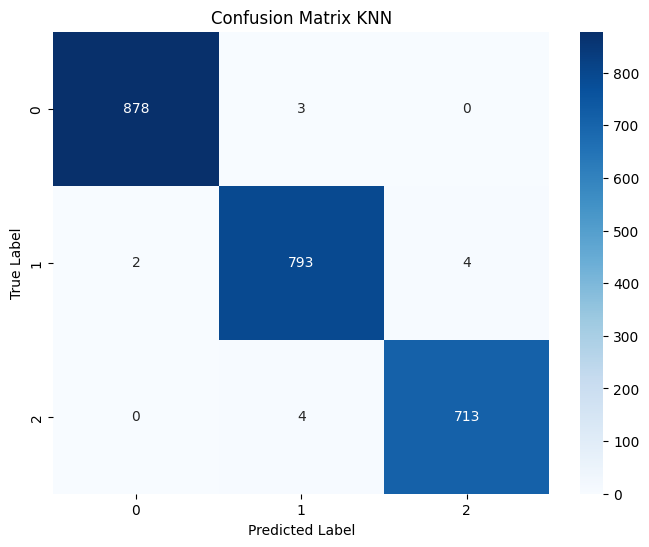

In [46]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_encoder.classes_, yticklabels=y_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix KNN")
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**


### **Perbandingan Sebelum dan Sesudah Tuning (KNN Classifier)**

1. **Akurasi tetap sama (0.95)**  
   Tuning tidak mengubah akurasi keseluruhan, yang menunjukkan bahwa performa model secara umum tetap konsisten.

2. **Perubahan pada Confusion Matrix**:
   - **Sebelum Tuning (Gambar Pertama)**:
     - **Kelas 0**: 879 benar, 2 salah → (Presisi & Recall sangat tinggi)
     - **Kelas 1**: 792 benar, 7 salah (3 ke kelas 0, 4 ke kelas 2)
     - **Kelas 2**: 712 benar, 5 salah (semua ke kelas 1)
   - **Sesudah Tuning (Gambar Kedua)**:
     - **Kelas 0**: 878 benar, 3 salah (1 kesalahan lebih banyak)
     - **Kelas 1**: 793 benar, 6 salah (1 kesalahan lebih sedikit)
     - **Kelas 2**: 713 benar, 4 salah (1 kesalahan lebih sedikit)

3. **Kesimpulan Perubahan**:
   - Tuning menghasilkan **peningkatan kecil** pada prediksi kelas 1 dan kelas 2.
   - Sedikit **penurunan performa** pada kelas 0 (dari 2 salah menjadi 3 salah).
   - Secara keseluruhan, perubahan kecil ini masih dalam batas toleransi dan tidak memengaruhi akurasi secara keseluruhan.

---

### **Identifikasi Kelemahan Model**
- **Kesalahan Prediksi Minor**:  
  Meskipun akurasi tinggi, masih terjadi kesalahan kecil antar kelas, terutama antara kelas 1 dan 2 yang sedikit mirip secara fitur.
- **Potensi Imbalance atau Ambiguitas Fitur**:  
  Jika kelas memiliki fitur yang mirip, KNN bisa kesulitan dalam membedakannya secara tegas, apalagi tanpa normalisasi yang tepat.

---

### **Rekomendasi Perbaikan Selanjutnya**
1. **Coba normalisasi fitur lain** (StandardScaler, MinMaxScaler) untuk meningkatkan pembeda antar kelas.
2. **Uji algoritma lain** seperti:
   - **SVM**: Untuk margin decision boundary yang lebih tajam.
   - **Random Forest**: Untuk pemahaman kompleks terhadap fitur.
3. **Tuning parameter lebih lanjut**:
   - Eksperimen dengan nilai **k** (jumlah tetangga).
   - Ubah metode weighting: `uniform` vs `distance`.
4. **Evaluasi dengan metrik lain** seperti:
   - **Precision, Recall, dan F1-Score per kelas**.
   - **ROC-AUC (jika binary atau tiap kelas terhadap lainnya)**.

